<a href="https://colab.research.google.com/github/Minjioo/Minjioo/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install transformers matplotlib pandas

In [12]:
import pandas as pd

# 샘플 데이터 생성
data = {
    "Review_ID": [1, 2, 3, 4, 5],
    "Review_Text": [
        "This movie was absolutely amazing!",
        "Worst film I've ever seen. Total waste.",
        "The plot was decent, but the acting was subpar.",
        "Loved every moment of this masterpiece.",
        "Not my cup of tea, but it had its moments."
    ],
}

# 데이터프레임 생성 및 CSV 저장
df = pd.DataFrame(data)
df.to_csv("movie_reviews.csv", index=False)
print("CSV 파일 생성 완료")


CSV 파일 생성 완료


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


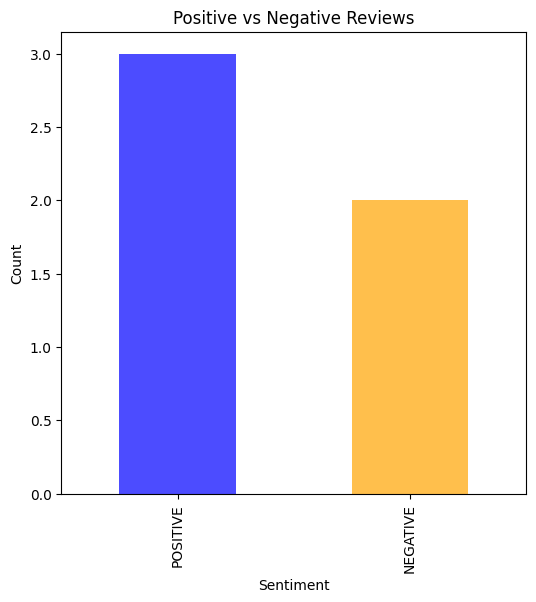

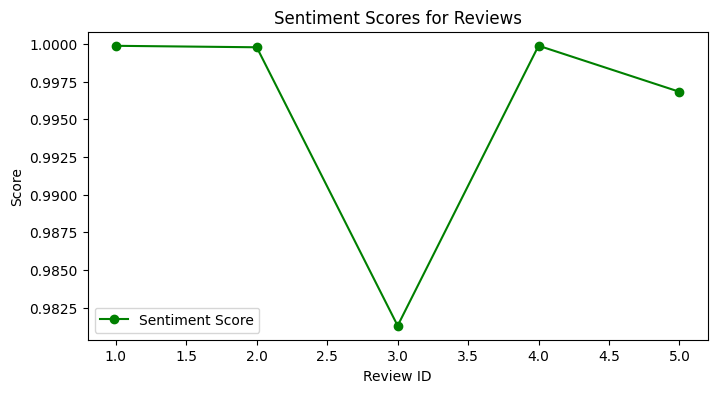

In [13]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Hugging Face 감정 분석 파이프라인 불러오기
sentiment_pipeline = pipeline("sentiment-analysis")

# 데이터 불러오기
df = pd.read_csv("movie_reviews.csv")

# 감정 분석 수행
results = []
for review in df["Review_Text"]:
    analysis = sentiment_pipeline(review)[0]
    results.append({"label": analysis["label"], "score": analysis["score"]})

# 결과를 데이터프레임에 추가
df["Sentiment"] = [res["label"] for res in results]
df["Score"] = [res["score"] for res in results]

# 긍정/부정 비율 시각화
sentiment_counts = df["Sentiment"].value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind="bar", color=["blue", "orange"], alpha=0.7)
plt.title("Positive vs Negative Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 리뷰별 점수 시각화
plt.figure(figsize=(8, 4))
plt.plot(df["Review_ID"], df["Score"], marker="o", linestyle="-", color="green", label="Sentiment Score")
plt.title("Sentiment Scores for Reviews")
plt.xlabel("Review ID")
plt.ylabel("Score")
plt.legend()
plt.show()